In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('Brazil_Patients_Data.csv')
df.head()

,Patient_ID,Age,Region,Bone,Blood,Lung,Skin,Urological,Heart,Other,Criticality,Operation
0,43191,64.0,Rio De Janerio,1733.0,1141.0,1114.0,118.0,780.0,8915.0,4029.0,Level-1,No
1,43221,78.0,Sao Paulo,1789.0,1205.0,1278.0,126.0,915.0,9589.0,4276.0,Level-2,No
2,43252,81.0,Manaus,1907.0,1143.0,1149.0,119.0,856.0,9339.0,4165.0,Level-3,Yes
3,43282,77.0,Salvador,1730.0,1210.0,1303.0,124.0,906.0,9710.0,4437.0,Level-3,Yes
4,43313,72.0,Curitiba,1733.0,1193.0,1177.0,115.0,871.0,9259.0,4170.0,Level-3,Yes


In [3]:
df.columns

Index(['Patient_ID', 'Age', 'Region', 'Bone', 'Blood', 'Lung', 'Skin',
       'Urological', 'Heart', 'Other', 'Criticality', 'Operation'],
      dtype='object')

In [4]:
df.shape

(2502, 12)

In [5]:
df.describe()

,Patient_ID,Age,Bone,Blood,Lung,Skin,Urological,Heart,Other
count,2502.000000,2496.000000,2499.000000,2499.000000,2494.000000,2497.000000,2499.000000,2493.000000,2500.000000
mean,49036.891687,74.883013,6338.392157,2831.777111,2533.215718,3519.861834,1186.064426,28169.691937,7840.073200
std,3467.697487,7.024430,3302.313609,1493.556560,1374.005987,2240.896920,1716.933672,14674.423459,3742.536141
min,43191.000000,-10.000000,1052.000000,508.000000,405.000000,102.000000,303.000000,5770.000000,2102.000000
25%,46016.500000,70.000000,3371.000000,1484.000000,1243.250000,1470.000000,558.000000,14519.000000,4242.250000
50%,49057.500000,75.000000,6198.000000,2695.000000,2474.500000,3589.000000,784.000000,27121.000000,7670.500000
75%,52042.000000,80.000000,9426.500000,4172.000000,3765.250000,5553.000000,998.000000,41873.000000,11352.750000
max,54992.000000,220.000000,12103.000000,5851.000000,5003.000000,7303.000000,11019.000000,53791.000000,14281.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2502 entries, 0 to 2501
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Patient_ID   2502 non-null   int64  
 1   Age          2496 non-null   float64
 2   Region       2502 non-null   object 
 3   Bone         2499 non-null   float64
 4   Blood        2499 non-null   float64
 5   Lung         2494 non-null   float64
 6   Skin         2497 non-null   float64
 7   Urological   2499 non-null   float64
 8   Heart        2493 non-null   float64
 9   Other        2500 non-null   float64
 10  Criticality  2502 non-null   object 
 11  Operation    2502 non-null   object 
dtypes: float64(8), int64(1), object(3)
memory usage: 234.7+ KB


In [7]:
df.isnull().sum()

Patient_ID     0
Age            6
Region         0
Bone           3
Blood          3
Lung           8
Skin           5
Urological     3
Heart          9
Other          2
Criticality    0
Operation      0
dtype: int64

In [8]:
#to check duplicate values
duplicated=df[df.duplicated()]
print("duplicated row")
duplicated

duplicated row


,Patient_ID,Age,Region,Bone,Blood,Lung,Skin,Urological,Heart,Other,Criticality,Operation
86,50258,70.0,Natal,1900.0,1127.0,1145.0,118.0,848.0,9281.0,4143.0,Level-3,Yes
386,53112,83.0,Manaus,2511.0,568.0,1095.0,276.0,1896.0,8599.0,2253.0,Level-2,Yes


In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.describe()

,Patient_ID,Age,Bone,Blood,Lung,Skin,Urological,Heart,Other
count,2500.000000,2494.000000,2497.000000,2497.000000,2492.000000,2495.000000,2497.000000,2491.000000,2498.000000
mean,49034.773200,74.881716,6341.702443,2833.366440,2534.349920,3522.525451,1185.915499,28185.131273,7843.789832
std,3468.040256,7.024686,3301.551316,1493.076881,1373.973406,2239.816841,1717.549290,14670.184795,3741.631544
min,43191.000000,-10.000000,1052.000000,508.000000,405.000000,102.000000,303.000000,5770.000000,2102.000000
25%,46014.750000,70.000000,3371.000000,1487.000000,1247.000000,1475.500000,558.000000,14550.000000,4247.500000
50%,49047.500000,75.000000,6200.000000,2697.000000,2475.500000,3594.000000,784.000000,27130.000000,7684.500000
75%,52042.000000,80.000000,9429.000000,4174.000000,3767.000000,5553.500000,998.000000,41875.500000,11360.250000
max,54992.000000,220.000000,12103.000000,5851.000000,5003.000000,7303.000000,11019.000000,53791.000000,14281.000000


In [11]:
df.isnull().sum()


Patient_ID     0
Age            6
Region         0
Bone           3
Blood          3
Lung           8
Skin           5
Urological     3
Heart          9
Other          2
Criticality    0
Operation      0
dtype: int64

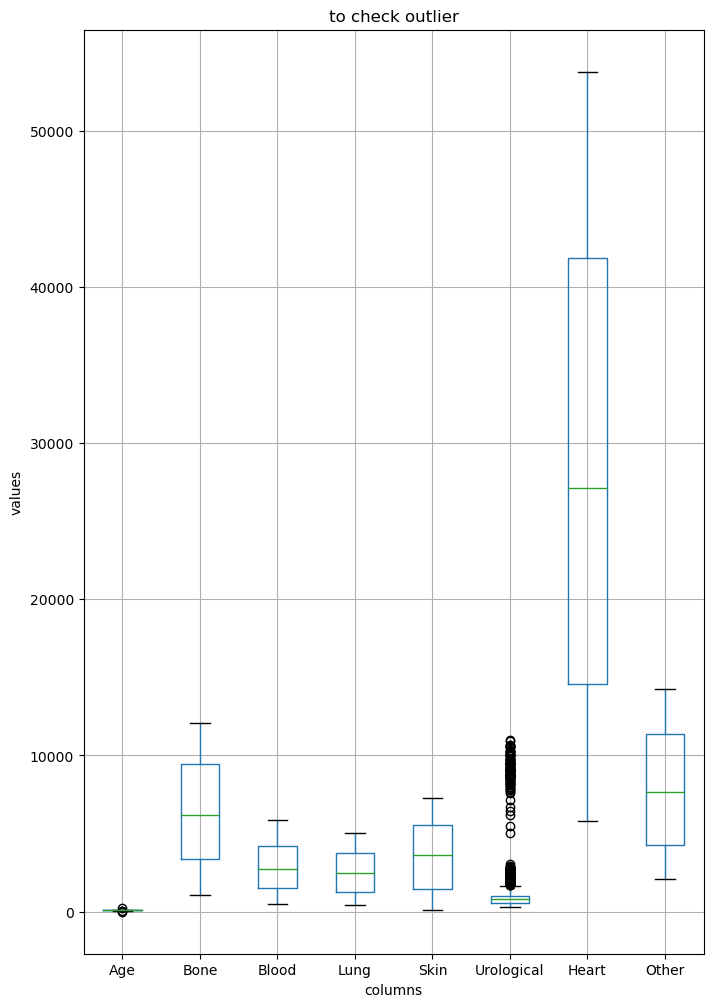

In [12]:
# to check outlier
plt.figure(figsize=(8,12))
df.boxplot(column=['Age','Bone','Blood','Lung','Skin','Urological','Heart','Other'])
plt.title("to check outlier")
plt.xlabel("columns")
plt.ylabel("values")
plt.show()

In [13]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [14]:
df['Urological'].fillna(df['Urological'].median(),inplace =True)

In [15]:
df['Bone'].fillna(df['Bone'].mean(),inplace=True)

In [16]:
df['Blood'].fillna(df['Blood'].mean(),inplace=True)

In [17]:
df['Lung'].fillna(df['Lung'].mean(),inplace=True)

In [18]:
df['Skin'].fillna(df['Skin'].mean(),inplace=True)

In [19]:
df['Heart'].fillna(df['Heart'].mean(),inplace=True)

In [20]:
df['Other'].fillna(df['Other'].mean(),inplace=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2500 entries, 0 to 2501
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Patient_ID   2500 non-null   int64  
 1   Age          2500 non-null   float64
 2   Region       2500 non-null   object 
 3   Bone         2500 non-null   float64
 4   Blood        2500 non-null   float64
 5   Lung         2500 non-null   float64
 6   Skin         2500 non-null   float64
 7   Urological   2500 non-null   float64
 8   Heart        2500 non-null   float64
 9   Other        2500 non-null   float64
 10  Criticality  2500 non-null   object 
 11  Operation    2500 non-null   object 
dtypes: float64(8), int64(1), object(3)
memory usage: 253.9+ KB


In [22]:
df.describe()

,Patient_ID,Age,Bone,Blood,Lung,Skin,Urological,Heart,Other
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,49034.773200,74.881716,6341.702443,2833.366440,2534.349920,3522.525451,1185.433200,28185.131273,7843.789832
std,3468.040256,7.016248,3299.568997,1492.180407,1371.772406,2237.575006,1716.574456,14643.744068,3740.133992
min,43191.000000,-10.000000,1052.000000,508.000000,405.000000,102.000000,303.000000,5770.000000,2102.000000
25%,46014.750000,70.000000,3374.750000,1489.250000,1248.750000,1479.750000,558.000000,14571.750000,4248.500000
50%,49047.500000,75.000000,6210.000000,2703.500000,2483.000000,3588.000000,784.000000,27209.500000,7701.000000
75%,52042.000000,80.000000,9425.250000,4171.000000,3759.250000,5547.000000,998.000000,41861.250000,11352.750000
max,54992.000000,220.000000,12103.000000,5851.000000,5003.000000,7303.000000,11019.000000,53791.000000,14281.000000


In [23]:
df.isnull().sum()

Patient_ID     0
Age            0
Region         0
Bone           0
Blood          0
Lung           0
Skin           0
Urological     0
Heart          0
Other          0
Criticality    0
Operation      0
dtype: int64

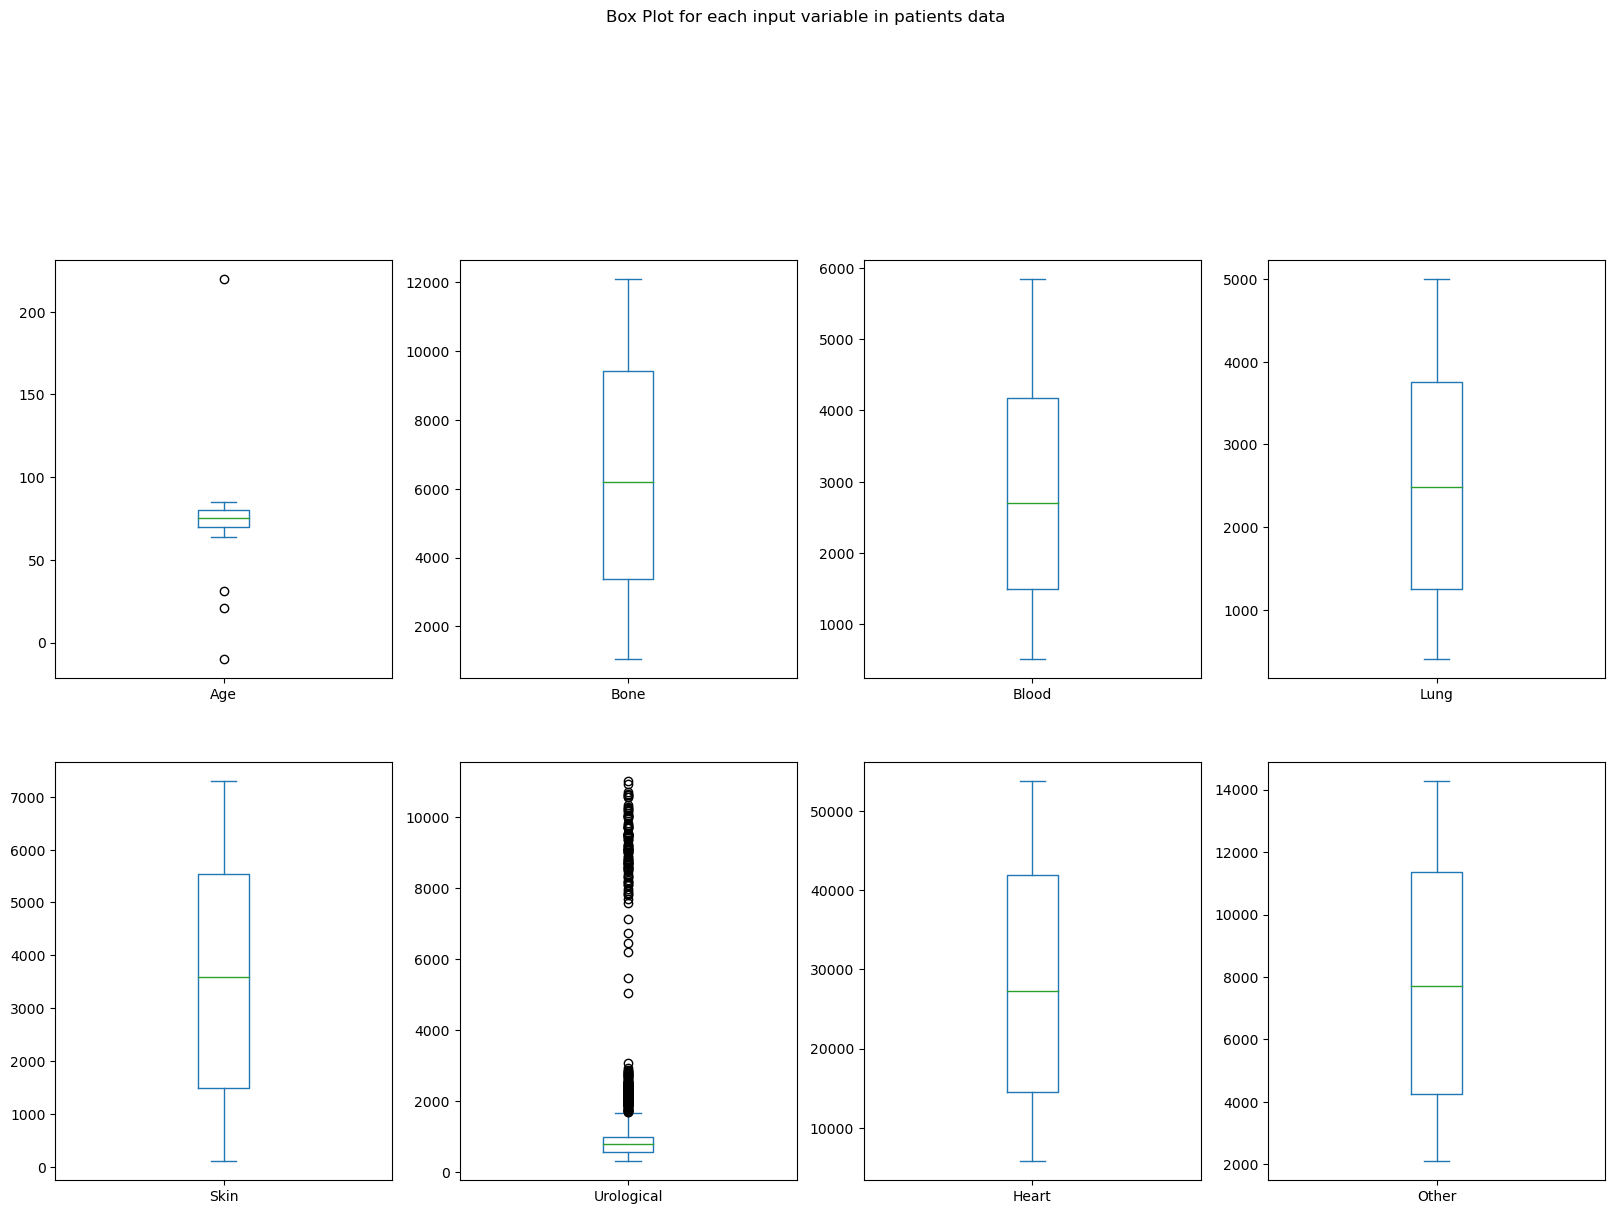

In [25]:
drop_cols = ['Patient_ID','Region','Criticality','Operation']
df.drop(drop_cols, axis=1).plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(20,25), 
                                        title='Box Plot for each input variable in patients data')
plt.savefig('patients_boxplot')
plt.show()

Text(0.5, 0, 'Value of Urological')

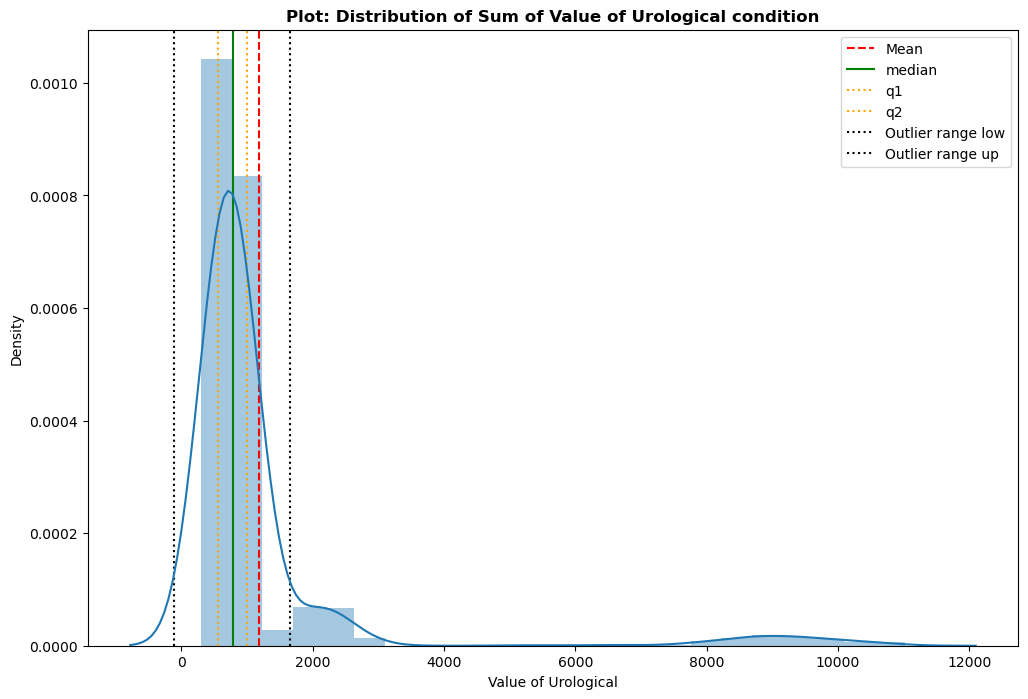

In [26]:
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

low=np.percentile(df["Urological"],25)
up=np.percentile(df["Urological"],75)
lqr=stats.iqr(df["Urological"])
low_value=low-lqr*1.5
up_value=up+lqr*1.5


plt.figure(figsize=(12,8))
plt.title("Plot: Distribution of Sum of Value of Urological condition",weight='bold')

mean_val=np.mean(df["Urological"])
median_val=np.median(df["Urological"])
q1=np.percentile(df["Urological"],25)
q2=np.percentile(df["Urological"],75)
plt.axvline(x=mean_val,color='Red',ls='--',label='Mean')
plt.axvline(x=median_val,color='green',ls='-',label='median')
plt.axvline(x=q1,color='Orange',ls=':',label='q1')
plt.axvline(x=q2,color='Orange',ls=':',label='q2')
plt.axvline(x=low_value,color='black',ls=':',label='Outlier range low')
plt.axvline(x=up_value,color='Black',ls=':',label='Outlier range up')

plt.legend()
sns.distplot(df["Urological"],bins=23)
plt.xlabel("Value of Urological")

Text(0.5, 0, 'Value of AGE')

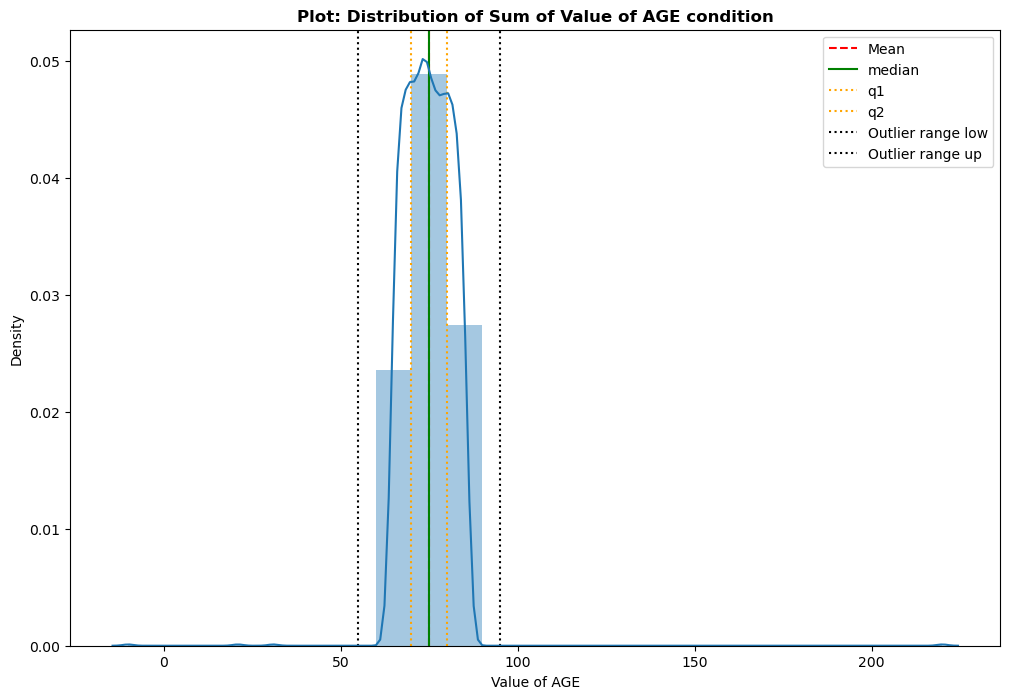

In [28]:
low=np.percentile(df["Age"],25)
up=np.percentile(df["Age"],75)
lqr=stats.iqr(df["Age"])
low_value=low-lqr*1.5
up_value=up+lqr*1.5


plt.figure(figsize=(12,8))
plt.title("Plot: Distribution of Sum of Value of AGE condition",weight='bold')

mean_val=np.mean(df["Age"])
median_val=np.median(df["Age"])
q1=np.percentile(df["Age"],25)
q2=np.percentile(df["Age"],75)
plt.axvline(x=mean_val,color='Red',ls='--',label='Mean')
plt.axvline(x=median_val,color='green',ls='-',label='median')
plt.axvline(x=q1,color='Orange',ls=':',label='q1')
plt.axvline(x=q2,color='Orange',ls=':',label='q2')
plt.axvline(x=low_value,color='black',ls=':',label='Outlier range low')
plt.axvline(x=up_value,color='Black',ls=':',label='Outlier range up')

plt.legend()
sns.distplot(df["Age"],bins=23)
plt.xlabel("Value of AGE")

In [29]:
median1=df.loc[df['Age']<85, 'Age'].median()
df.loc[df['Age']>85,'Age']=np.nan
df.fillna(median1,inplace=True)

In [30]:
median2=df.loc[df['Age']>60, 'Age'].median()
df.loc[df['Age']<60,'Age']=np.nan
df.fillna(median2,inplace=True)

In [31]:
median3=df.loc[df['Urological']<1380, 'Urological'].median()
df.loc[df['Urological']>1380,'Urological']=np.nan
df.fillna(median3,inplace=True)

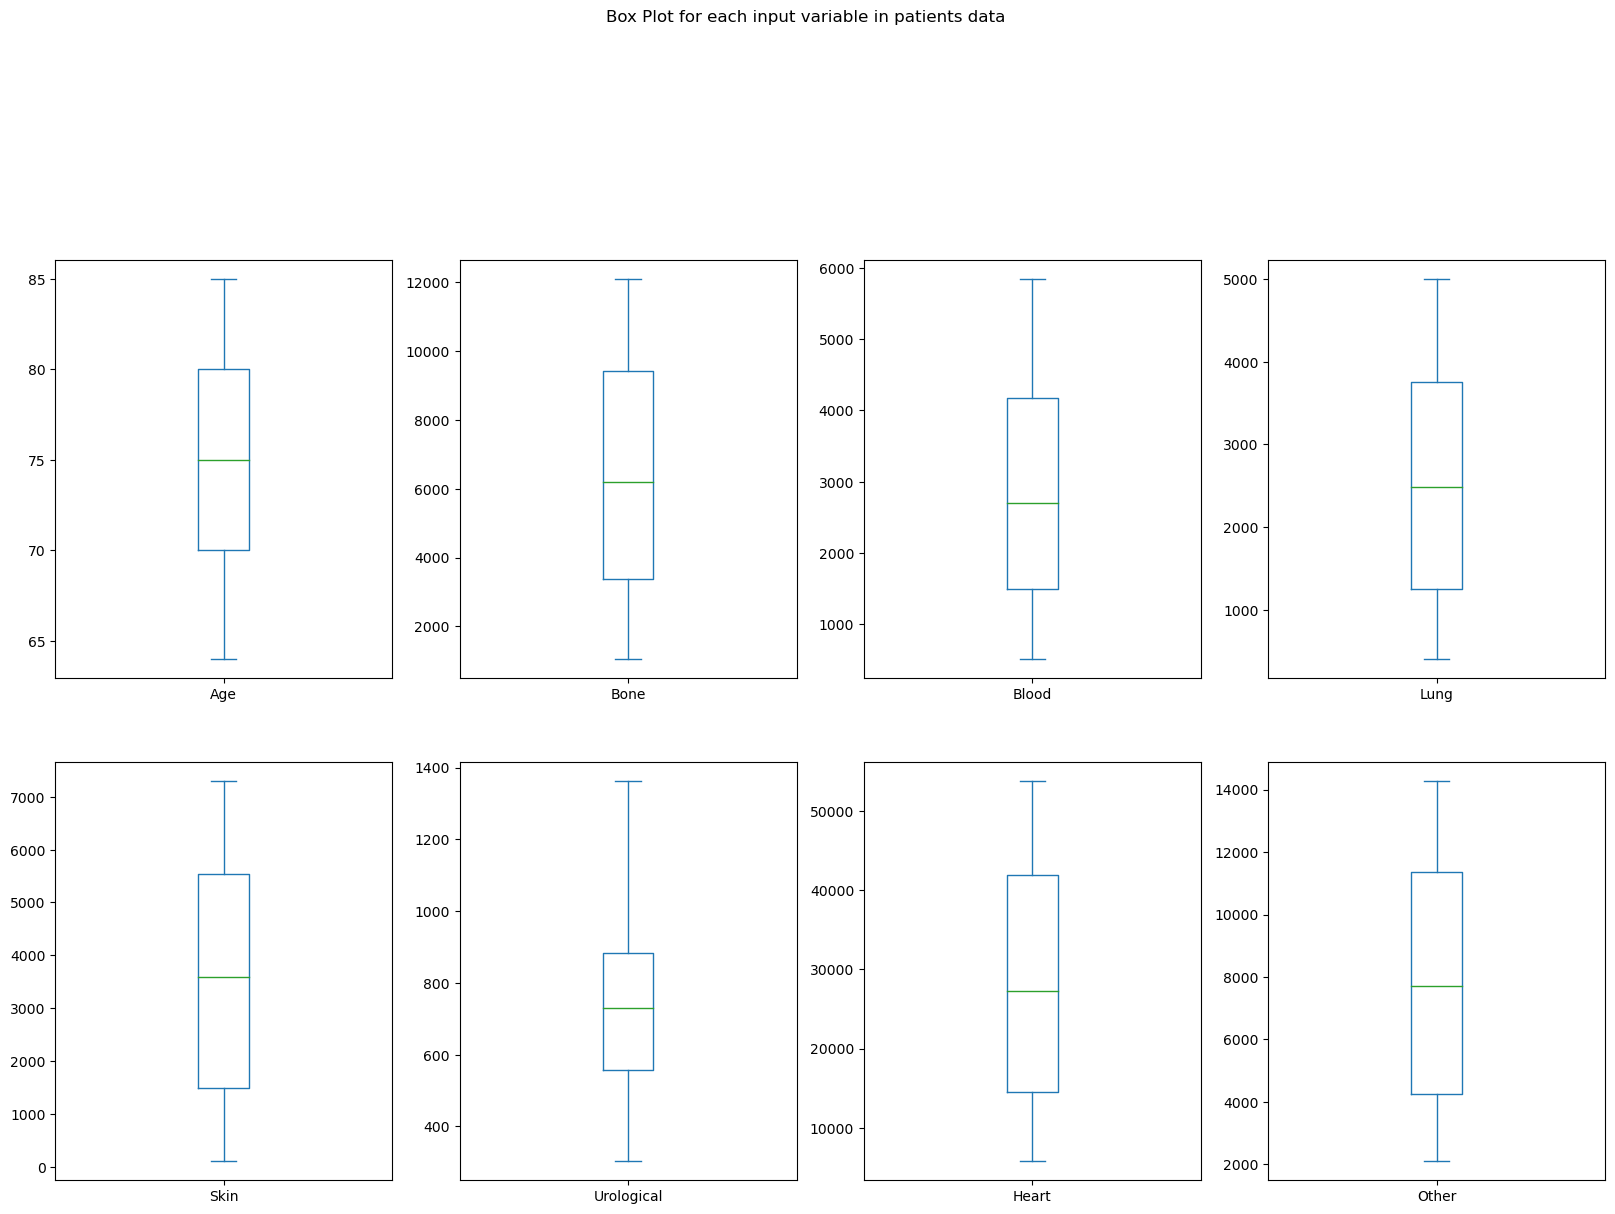

In [32]:
drop_cols = ['Patient_ID','Region','Criticality','Operation','Criticality']
df.drop(drop_cols, axis=1).plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(20,25), 
                                        title='Box Plot for each input variable in patients data')
plt.savefig('patients_boxplot')
plt.show()

Text(0.5, 0, 'Value of Urological')

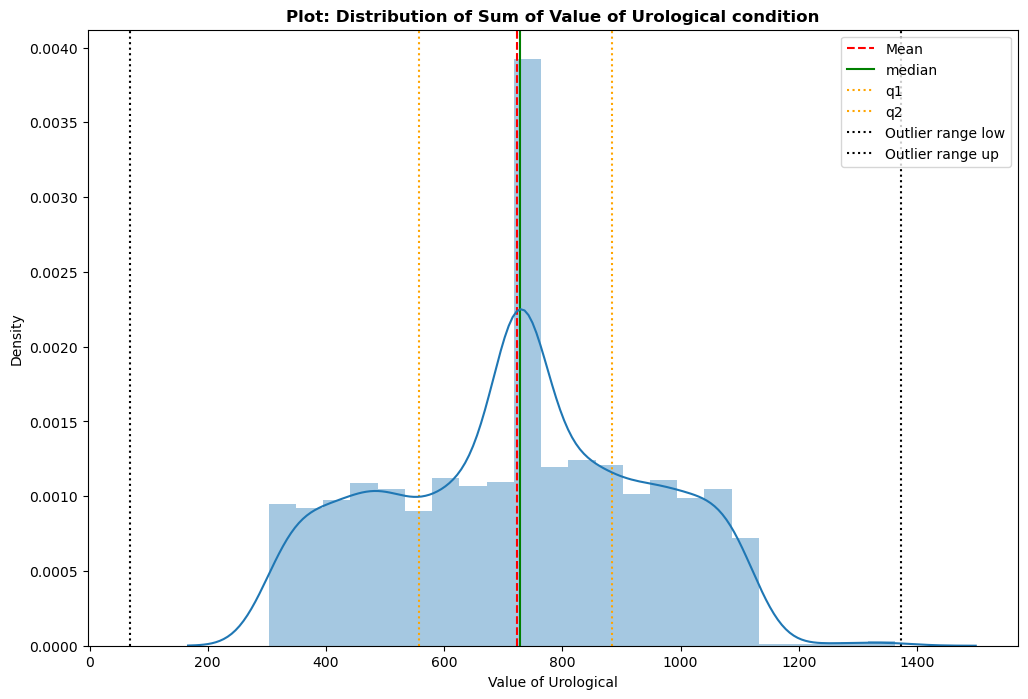

In [33]:
low=np.percentile(df["Urological"],25)
up=np.percentile(df["Urological"],75)
lqr=stats.iqr(df["Urological"])
low_value=low-lqr*1.5
up_value=up+lqr*1.5


plt.figure(figsize=(12,8))
plt.title("Plot: Distribution of Sum of Value of Urological condition",weight='bold')

mean_val=np.mean(df["Urological"])
median_val=np.median(df["Urological"])
q1=np.percentile(df["Urological"],25)
q2=np.percentile(df["Urological"],75)
plt.axvline(x=mean_val,color='Red',ls='--',label='Mean')
plt.axvline(x=median_val,color='green',ls='-',label='median')
plt.axvline(x=q1,color='Orange',ls=':',label='q1')
plt.axvline(x=q2,color='Orange',ls=':',label='q2')
plt.axvline(x=low_value,color='black',ls=':',label='Outlier range low')
plt.axvline(x=up_value,color='Black',ls=':',label='Outlier range up')

plt.legend()
sns.distplot(df["Urological"],bins=23)
plt.xlabel("Value of Urological")

In [34]:
df.describe()

,Patient_ID,Age,Bone,Blood,Lung,Skin,Urological,Heart,Other
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,49034.773200,74.896516,6341.702443,2833.366440,2534.349920,3522.525451,723.374000,28185.131273,7843.789832
std,3468.040256,5.998776,3299.568997,1492.180407,1371.772406,2237.575006,217.244373,14643.744068,3740.133992
min,43191.000000,64.000000,1052.000000,508.000000,405.000000,102.000000,303.000000,5770.000000,2102.000000
25%,46014.750000,70.000000,3374.750000,1489.250000,1248.750000,1479.750000,558.000000,14571.750000,4248.500000
50%,49047.500000,75.000000,6210.000000,2703.500000,2483.000000,3588.000000,729.000000,27209.500000,7701.000000
75%,52042.000000,80.000000,9425.250000,4171.000000,3759.250000,5547.000000,884.000000,41861.250000,11352.750000
max,54992.000000,85.000000,12103.000000,5851.000000,5003.000000,7303.000000,1363.000000,53791.000000,14281.000000


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2500 entries, 0 to 2501
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Patient_ID   2500 non-null   int64  
 1   Age          2500 non-null   float64
 2   Region       2500 non-null   object 
 3   Bone         2500 non-null   float64
 4   Blood        2500 non-null   float64
 5   Lung         2500 non-null   float64
 6   Skin         2500 non-null   float64
 7   Urological   2500 non-null   float64
 8   Heart        2500 non-null   float64
 9   Other        2500 non-null   float64
 10  Criticality  2500 non-null   object 
 11  Operation    2500 non-null   object 
dtypes: float64(8), int64(1), object(3)
memory usage: 253.9+ KB


## LABEL ENCODING

In [36]:
from sklearn.preprocessing import LabelEncoder
label_enco=LabelEncoder()
df['Criticality']=label_enco.fit_transform(df.Criticality)
df['Operation']=label_enco.fit_transform(df.Operation)
uniquecriticity=df['Criticality'].unique()
uniqueoperaion=df['Operation'].unique()
print(uniquecriticity)
print(uniqueoperaion)

[0 1 2]
[0 1]


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2500 entries, 0 to 2501
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Patient_ID   2500 non-null   int64  
 1   Age          2500 non-null   float64
 2   Region       2500 non-null   object 
 3   Bone         2500 non-null   float64
 4   Blood        2500 non-null   float64
 5   Lung         2500 non-null   float64
 6   Skin         2500 non-null   float64
 7   Urological   2500 non-null   float64
 8   Heart        2500 non-null   float64
 9   Other        2500 non-null   float64
 10  Criticality  2500 non-null   int32  
 11  Operation    2500 non-null   int32  
dtypes: float64(8), int32(2), int64(1), object(1)
memory usage: 234.4+ KB


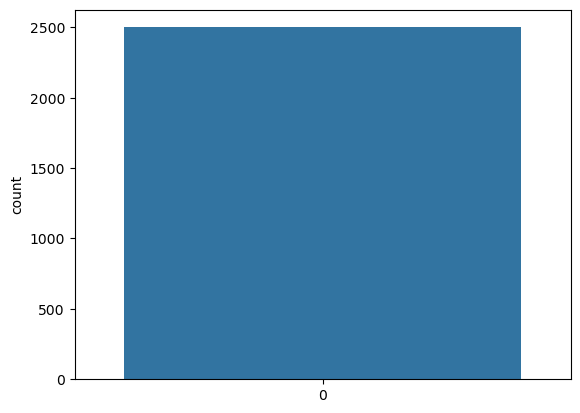

In [38]:
sns.countplot(df['Operation'],label="Count")
plt.show()

In [39]:
df.corr()

,Patient_ID,Age,Bone,Blood,Lung,Skin,Urological,Heart,Other,Criticality,Operation
Patient_ID,1.000000,0.007397,0.047456,0.024094,0.030261,0.035089,-0.019711,0.032704,0.030825,0.023343,0.015518
Age,0.007397,1.000000,-0.013379,-0.017121,0.025407,0.004194,0.013956,-0.010723,0.007558,-0.001954,0.279358
Bone,0.047456,-0.013379,1.000000,0.227860,0.250278,0.200081,-0.066696,0.241890,0.246951,0.007217,0.044102
Blood,0.024094,-0.017121,0.227860,1.000000,0.215579,0.214793,-0.017397,0.243860,0.226402,-0.027343,-0.014961
Lung,0.030261,0.025407,0.250278,0.215579,1.000000,0.139930,-0.035939,0.246369,0.279450,-0.017831,0.030637
Skin,0.035089,0.004194,0.200081,0.214793,0.139930,1.000000,-0.031518,0.191700,0.177752,-0.005618,0.012694
Urological,-0.019711,0.013956,-0.066696,-0.017397,-0.035939,-0.031518,1.000000,-0.040221,-0.051279,0.010132,-0.026902
Heart,0.032704,-0.010723,0.241890,0.243860,0.246369,0.191700,-0.040221,1.000000,0.246147,-0.012639,0.011341
Other,0.030825,0.007558,0.246951,0.226402,0.279450,0.177752,-0.051279,0.246147,1.000000,-0.003517,-0.003759
Criticality,0.023343,-0.001954,0.007217,-0.027343,-0.017831,-0.005618,0.010132,-0.012639,-0.003517,1.000000,0.383495


<Axes: >

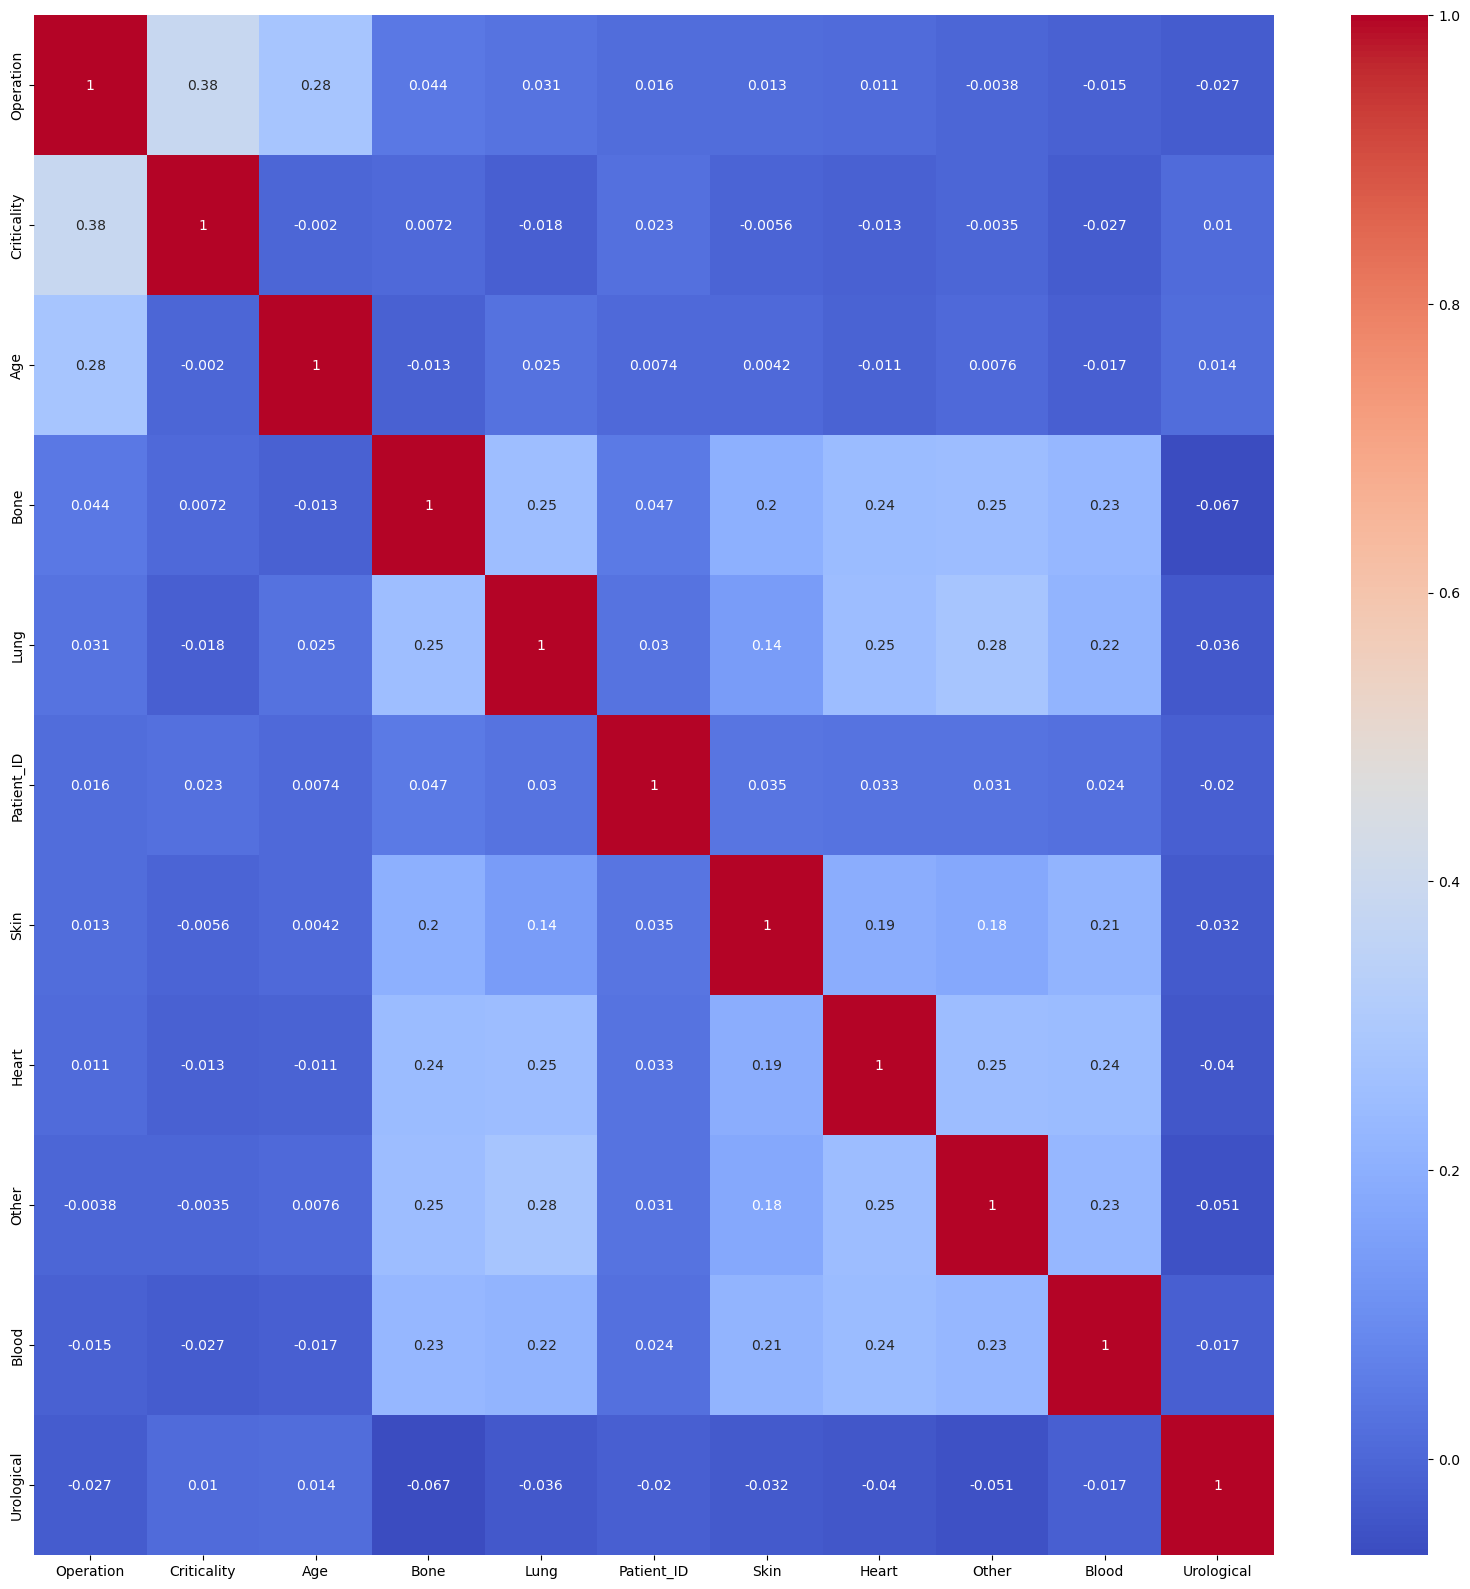

In [40]:
plt.figure(figsize=(20,20))
corrmat=df.corr()
op_corr_features = corrmat.nlargest(30, 'Operation')['Operation'].index
sns.heatmap(df[op_corr_features].corr(),annot=True, cmap='coolwarm')

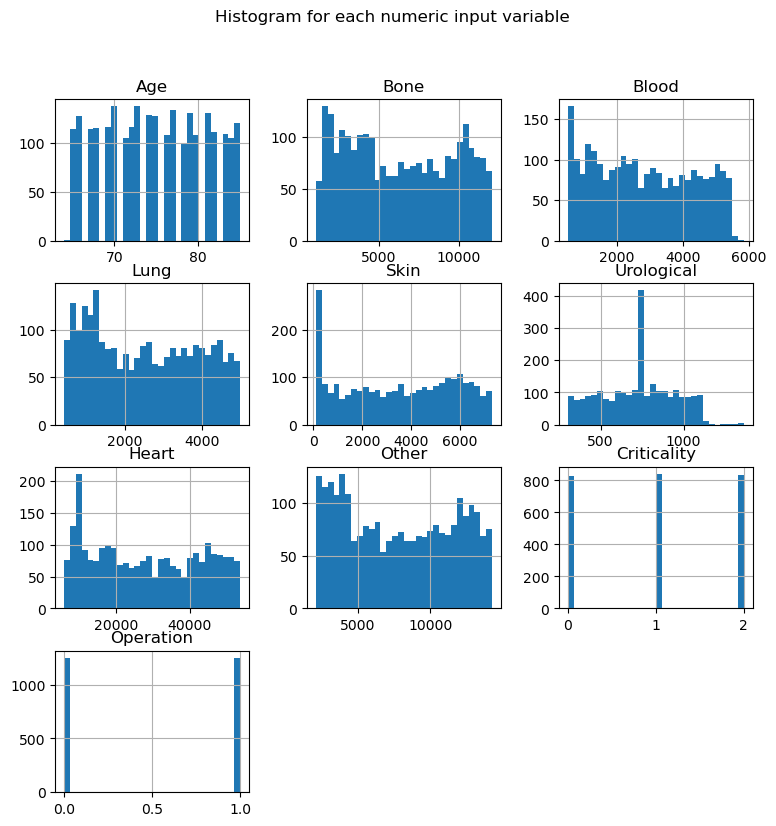

In [42]:
feature_drop = ['Patient_ID','Region',]
df.drop(feature_drop ,axis=1).hist(bins=30, figsize=(9,9))
plt.suptitle("Histogram for each numeric input variable")
plt.savefig('patients_hist')
plt.show()

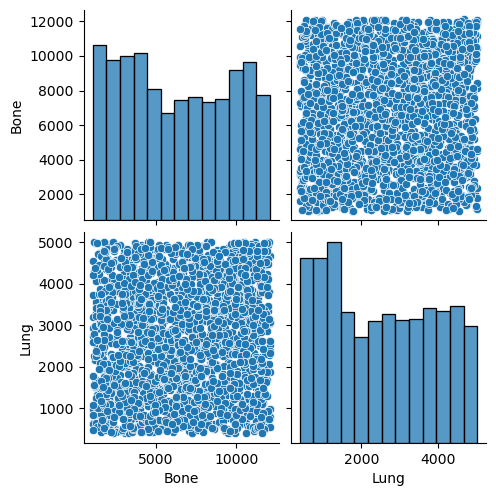

In [44]:
sns.pairplot(df[['Bone', 'Lung']])

<Axes: xlabel='Age'>

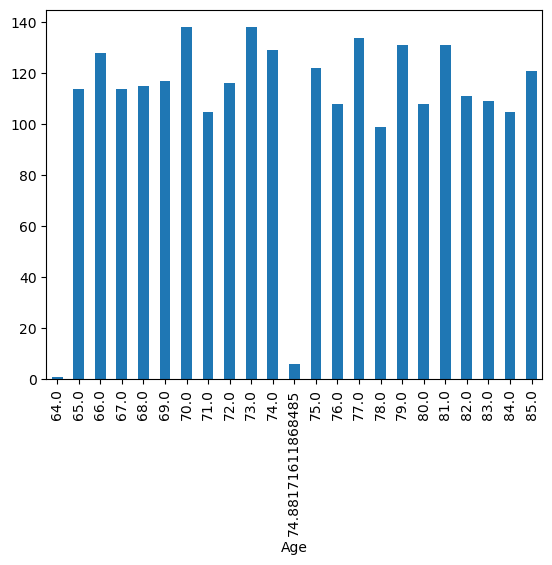

In [46]:
#Relation of Age with Critical patients
df.groupby('Age')['Criticality'].count().plot(kind='bar')

<Axes: xlabel='Region'>

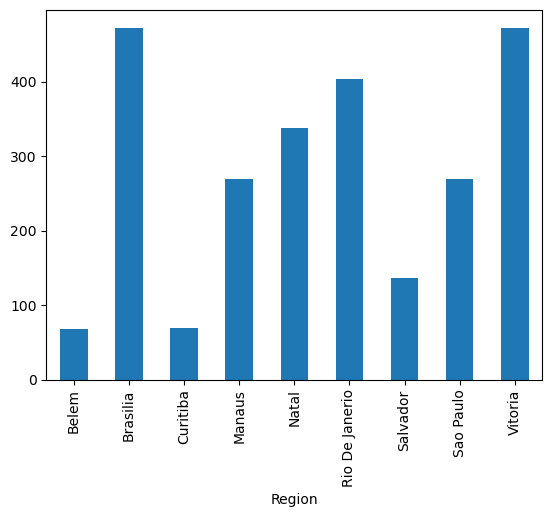

In [47]:
#Region with highest patient count
df.groupby(['Region'])['Patient_ID'].count().plot(kind='bar')

<Axes: xlabel='Criticality,Operation'>

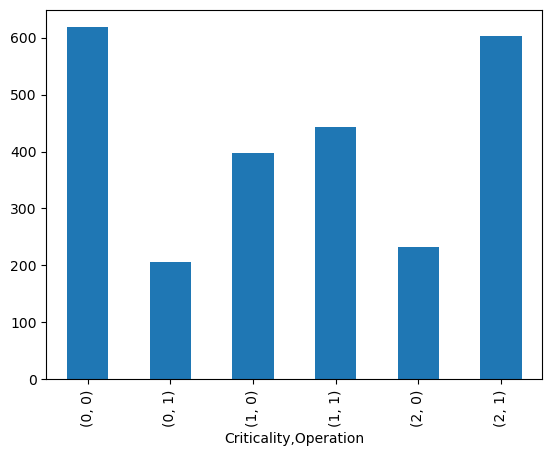

In [48]:
#Which category of criticality is favoured for operation?
df.groupby(['Criticality','Operation'])['Patient_ID'].count().plot(kind='bar')

<Axes: xlabel='Criticality,Operation'>

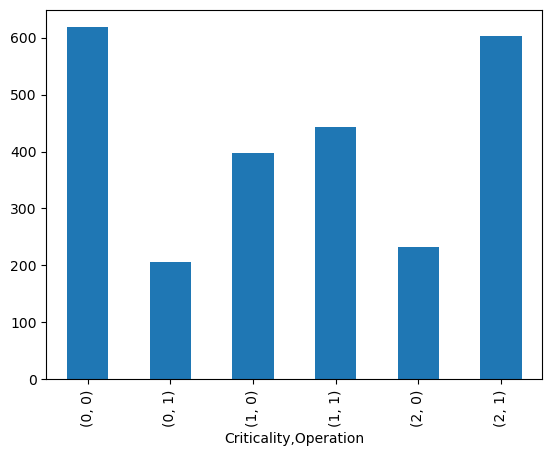

In [49]:
#Which category of criticality is favoured for operation? (Before Label Encoding)
df.groupby(['Criticality','Operation'])['Patient_ID'].count().plot(kind='bar')

In [51]:
feature_names = ['Age', 'Bone', 'Blood','Lung','Skin','Urological','Heart','Other','Criticality']
X = df[feature_names]
y = df['Operation']

In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30,random_state=42)

In [60]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)


In [61]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(X_train,y_train)


LogisticRegression()

In [62]:
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.65
Accuracy of Logistic regression classifier on test set: 0.69


In [63]:
prediction=logreg.predict(X_test)

In [66]:
df_show=pd.DataFrame({"Actual":y_test,"Prediction":prediction})
df_show
                      

,Actual,Prediction
1449,1,1
1116,1,0
1066,1,1
2289,1,1
1539,1,1
...,...,...
429,1,1
106,1,1
2046,1,0
122,1,0


## Confusion matrix
The confusion matrix lays out correctly and incorrectly classified cases. For the binary (two-class) case the confusion matrix is organized as the matrix in the above cell for logistic regression.

Here the four elements in the matrix are defined as: True Positive or TP are cases with positive labels which have been correctly classified as positive. True Negative or TN are cases with negative labels which have been correctly classified as negative. False Positive or FP are cases with negative labels which have been incorrectly classified as positive. False Negative or FN are cases with positive labels which have been incorrectly classified as negative.

When creating a confusion matrix it is important to understand and maintain a convention for which differentiating positive and negative label values. The usual convention is to call the 1 case positive and the 0 case negative.

Notice that there is an ambiguity in which case is considered positive and which is considered negative when the confusion matrix is computed. Whenever you examine a confusion matrix it is a good idea to spend a moment and decide which case is which. This step will help you relate the results to the problem at hand.

Accuracy
Accuracy is a simple and often misused metric. In simple terms, accuracy is the fraction of cases correctly classified.

Accuracy can be quite misleading. For example, say a classifier is used to detect the eligibility of operationwith 0.7 accuracy can be misleading as well as it is giving a score based on current scenario which not necessarily gives assurance of future prediction. In this case where data is balanced, accuracy can be considered as a measure of evaluation.

Precision
Precision is the fraction of correctly classified label cases out of all cases classified with that label value.

In other words, the precision statistic is the number of correctly classified cases for the label value divided by all the cases in the column. Thus, precision is sensitive to the number of cases correctly classified for a given score value.This tells when you predict something positive, how many times they were actually positive

Recall
Recall is the fraction of cases of a label value correctly classified out of all cases that actually have that label value.

In other words, the recall statistic is the number of correctly classified cases for the label value divided by all the cases in the row. Thus, recall is sensitive to the number of cases correctly classified for a given true label value. This tells out of actual positive data, how many times you predicted correctly.

F1
The F1 statistic is weighted average of precision and recall. We can express F1 by the following relationship: In other words, F1 is a weighted metric for overall model performance.

ROC and AUC
The receiver operating characteristic or ROC is a curve that displays the relationship between the true positive rate on the vertical axis and false positive rate on the horizontal axis. The ROC curve shows the tradeoff between true positive rate and false positive rate. An example is illustrated below.

In principle, you can pick the desired operating point for a classifier on this curve. Towards the left favors low false positive rate at the expense of true positive rate. Towards the right favors high true positive rate at the expense of higher false positive rate.

In [72]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score,recall_score,auc,roc_curve
print("precision_Score",precision_score(y_test,prediction))

precision_Score 0.7165775401069518


In [74]:
print("recall_Score",recall_score(y_test,prediction))

recall_Score 0.6784810126582278


In [77]:
print(confusion_matrix(y_test,prediction))
print(classification_report(y_test,prediction))

[[249 106]
 [127 268]]
              precision    recall  f1-score   support

           0       0.66      0.70      0.68       355
           1       0.72      0.68      0.70       395

    accuracy                           0.69       750
   macro avg       0.69      0.69      0.69       750
weighted avg       0.69      0.69      0.69       750

